In [1]:
# fix for keras v3.0 update
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1' 

# tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# python based
import random
from pathlib import Path
import time
import argparse
import json
import submitit
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# custom code
from OptimizedDataGenerator import OptimizedDataGenerator
from loss import *
from models import *

2024-09-10 12:29:56.149530: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 12:29:56.152166: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 12:29:56.182974: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 12:29:56.182996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 12:29:56.183858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# set gpu growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

output_directory = Path("./training_output2").resolve()
batch_size = 500
val_batch_size = 500

if not os.path.exists(output_directory):
    os.mkdir(output_directory)
    
os.makedirs(output_directory, exist_ok=True)
print(output_directory)

# paths
data_directory_path = "/home/elizahoward/cmspix28-mc-sim/minbiasDataSet1/"
labels_directory_path = "/home/elizahoward/cmspix28-mc-sim/minbiasDataSet1/"
    
# create tf records directory
stamp = '%08x' % random.randrange(16**8)
tfrecords_dir_train = Path(output_directory, f"tfrecords_train_{stamp}").resolve()
tfrecords_dir_validation = Path(output_directory, f"tfrecords_validation_{stamp}").resolve()
if not os.path.exists(tfrecords_dir_train):
    os.mkdir(tfrecords_dir_train)
    os.mkdir(tfrecords_dir_validation)

# training generator
start_time = time.time()
training_generator = OptimizedDataGenerator(
    data_directory_path = data_directory_path,
    labels_directory_path = labels_directory_path,
    is_directory_recursive = False,
    file_type = "parquet",
    data_format = "3D",
    batch_size = batch_size,
    to_standardize= False,
    include_y_local= True,
    labels_list = ['x-midplane','y-midplane','cotAlpha','cotBeta'],
    input_shape = (2,13,21), # (20,13,21),
    transpose = (0,2,3,1),
    save=True,
    use_time_stamps = [0,19],
    tfrecords_dir = tfrecords_dir_train,
)
print("--- Training generator %s seconds ---" % (time.time() - start_time))

data_directory_path = "/home/elizahoward/cmspix28-mc-sim/minbiasDataSet2/"
labels_directory_path = "/home/elizahoward/cmspix28-mc-sim/minbiasDataSet2/"

start_time = time.time()
validation_generator = OptimizedDataGenerator(
    data_directory_path = data_directory_path,
    labels_directory_path = labels_directory_path,
    is_directory_recursive = False,
    file_type = "parquet",
    data_format = "3D",
    batch_size = val_batch_size,
    to_standardize= False,
    include_y_local= True,
    labels_list = ['x-midplane','y-midplane','cotAlpha','cotBeta'],
    input_shape = (2,13,21), # (20,13,21),
    transpose = (0,2,3,1),
    use_time_stamps = [0,19],
    tfrecords_dir = tfrecords_dir_validation,
)
print("--- Validation generator %s seconds ---" % (time.time() - start_time))

/home/elizahoward/smart-pixels-ml/training_output2
Directory /home/elizahoward/smart-pixels-ml/training_output2/tfrecords_train_4a04a8f2 is removed...


2024-09-10 12:29:58.743442: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Saving batches as TFRecords: 100%|██████████| 50/50 [00:04<00:00, 10.26it/s]


Error saving batch 0: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 1: local variable 'ylocal_df' referenced before assignment
Error saving batch 2: local variable 'ylocal_df' referenced before assignment
Error saving batch 3: local variable 'ylocal_df' referenced before assignment
Error saving batch 4: local variable 'ylocal_df' referenced before assignment
Error saving batch 5: local variable 'ylocal_df' referenced before assignment
Error saving batch 6: local variable 'ylocal_df' referenced before assignment
Error saving batch 7: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 8: local variable 'ylocal_df' referenced before assignment
Error saving batch 9: local variable 'ylocal_df' referenced before assignment
Error saving batch 10: local variable 'ylocal_df' referenced before assignment
Error saving batch 11: local variable 'ylocal_df' referenced before assignment
Error saving batch 12: local variable 'ylocal_df' referenced

Saving batches as TFRecords: 100%|██████████| 11/11 [00:01<00:00,  7.07it/s]


Error saving batch 0: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 1: local variable 'ylocal_df' referenced before assignment
Error saving batch 2: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 3: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 4: local variable 'ylocal_df' referenced before assignment
Error saving batch 5: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 6: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 7: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 8: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 9: Can't convert non-rectangular Python sequence to Tensor.
Error saving batch 10: Can't convert non-rectangular Python sequence to Tensor.
--- Validation generator 6.467097997665405 seconds ---


In [3]:
 # compiles model
n_filters = 5 # model number of filters
pool_size = 3 # model pool size
learning_rate = 0.001
start_time = time.time()
model=CreateModel(shape=(13,21,2), n_filters=n_filters, pool_size=pool_size)
model.summary()
model.compile(optimizer=Adam(learning_rate=learning_rate), loss=custom_loss)

print("--- Model create and compile %s seconds ---" % (time.time() - start_time))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13, 21, 2)]       0         
                                                                 
 q_separable_conv2d (QSepar  (None, 11, 19, 5)         33        
 ableConv2D)                                                     
                                                                 
 q_activation (QActivation)  (None, 11, 19, 5)         0         
                                                                 
 q_conv2d (QConv2D)          (None, 11, 19, 5)         30        
                                                                 
 q_activation_1 (QActivatio  (None, 11, 19, 5)         0         
 n)                                                              
                                                                 
 average_pooling2d (Average  (None, 3, 6, 5)           0     

In [12]:
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss=custom_loss)

In [15]:
epochs = 25
early_stopping_patience = 50

# launch quick training once gpu is available
es = EarlyStopping(
        patience=early_stopping_patience,
        restore_best_weights=True
)
    
# checkpoint path
checkpoint_filepath = Path(output_directory, 'weights.{epoch:02d}-t{loss:.2f}-v{val_loss:.2f}.hdf5').resolve()
mcp = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        save_best_only=True,
)

# train
history = model.fit(x=training_generator,
                        validation_data=validation_generator,
                        callbacks=[mcp],
                        epochs=epochs,
                        shuffle=False, # shuffling now occurs within the data-loader
                        verbose=1)
    
# clean up tf records
#shutil.rmtree(tfrecords_dir_train)
#shutil.rmtree(tfrecords_dir_validation)

Epoch 1/25
 3/50 [>.............................] - ETA: 1s - loss: -111.1237

50/50 [==============================] - 3s 53ms/step - loss: -137.3158 - val_loss: -26.7512
Epoch 2/25
50/50 [==============================] - 3s 52ms/step - loss: -73.0274 - val_loss: -10.9665
Epoch 3/25
50/50 [==============================] - 3s 52ms/step - loss: -77.4985 - val_loss: -102.9645
Epoch 4/25
50/50 [==============================] - 3s 52ms/step - loss: -104.4403 - val_loss: -52.4184
Epoch 5/25
50/50 [==============================] - 3s 51ms/step - loss: -115.8317 - val_loss: -54.0908
Epoch 6/25
50/50 [==============================] - 3s 52ms/step - loss: -125.9215 - val_loss: 1.2781
Epoch 7/25
50/50 [==============================] - 3s 53ms/step - loss: -165.2285 - val_loss: 131.7540
Epoch 8/25
50/50 [==============================] - 3s 54ms/step - loss: -106.0172 - val_loss: -118.4917
Epoch 9/25
50/50 [==============================] - 3s 53ms/step - loss: -142.6218 - val_loss: -107.7680
Epoch 10/25
50/50 [==============================] - 3s 53ms/step - loss: -1

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f0a81aa0580>>
Traceback (most recent call last):
  File "/home/daq/venv/lib64/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Epoch 16/25
50/50 [==============================] - 3s 54ms/step - loss: -185.9303 - val_loss: -105.6461
Epoch 17/25
50/50 [==============================] - 3s 53ms/step - loss: -213.1502 - val_loss: -115.3735
Epoch 18/25
50/50 [==============================] - 3s 52ms/step - loss: -184.8320 - val_loss: -120.2077
Epoch 19/25
50/50 [==============================] - 3s 53ms/step - loss: -214.2647 - val_loss: -160.7336
Epoch 20/25
50/50 [==============================] - 3s 52ms/step - loss: -201.7005 - val_loss: -42.2464
Epoch 21/25
50/50 [==============================] - 3s 54ms/step - loss: -150.7474 - val_loss: -84.7140
Epoch 22/25
50/50 [==============================] - 3s 52ms/step - loss: -209.5793 - val_loss: -135.9467
Epoch 23/25
50/50 [==============================] - 3s 52ms/step - loss: -225.7320 - val_loss: -180.1880
Epoch 24/25
50/50 [==============================] - 3s 52ms/step - loss: -240.4271 - val_loss: -166.2234
Epoch 25/25
50/50 [=============================

In [14]:
model.load_weights("/home/elizahoward/smart-pixels-ml/training_output/weights.08-t-12.89-v-49.49.hdf5")

In [8]:
p_test = model.predict(validation_generator)

11/11 [==============================] - 1s 54ms/step


In [9]:
complete_truth = None
for _, y in tqdm(validation_generator):
        if complete_truth is None:
            complete_truth = y
        else:
            complete_truth = np.concatenate((complete_truth, y), axis=0)

100%|██████████| 11/11 [00:00<00:00, 30.29it/s]


In [10]:
maxval=1e9
minval=1e-9

# creates df with all predicted values and matrix elements - 4 predictions, all 10 unique matrix elements
df = pd.DataFrame(p_test,columns=['x','M11','y','M22','cotA','M33','cotB','M44','M21','M31','M32','M41','M42','M43'])
df['x'] *= 75
df['y'] *= 18.75
df['cotA'] *= 8
df['cotB'] *= 0.5

# stores all true values in same matrix as xtrue, ytrue, etc.
df['xtrue'] = complete_truth[:,0]*75
df['ytrue'] = complete_truth[:,1]*18.75
df['cotAtrue'] = complete_truth[:,2]*8
df['cotBtrue'] = complete_truth[:,3]*0.5
df['M11'] = minval+tf.math.maximum(df['M11'], 0)
df['M22'] = minval+tf.math.maximum(df['M22'], 0)
df['M33'] = minval+tf.math.maximum(df['M33'], 0)
df['M44'] = minval+tf.math.maximum(df['M44'], 0)

df['sigmax'] = abs(df['M11'])
df['sigmay'] = np.sqrt(df['M21']**2 + df['M22']**2)
df['sigmacotA'] = np.sqrt(df['M31']**2+df['M32']**2+df['M33']**2)
df['sigmacotB'] = np.sqrt(df['M41']**2+df['M42']**2+df['M43']**2+df['M44']**2)

# calculates residuals for x, y, cotA, cotB
residualsx = df['xtrue'] - df['x']
residualsy = df['ytrue'] - df['y']
residualsA = df['cotAtrue'] - df['cotA']
residualsB = df['cotBtrue'] - df['cotB']

# stores results as csv
df.to_csv("test_4x4.csv",header=True,index=False)

In [11]:
# x
xmean, xstd = (np.mean(residualsx),np.std(residualsx))
print(f"mean and std residuals for x-midplane: ({xmean},{xstd})")
# y
ymean, ystd = (np.mean(residualsy),np.std(residualsy))
print(f"mean and std residuals for y-midplane: ({ymean},{ystd})")
# cotA
cotAmean, cotAstd = (np.mean(residualsA),np.std(residualsA))
print(f"mean and std residuals for cot(alpha): ({cotAmean},{cotAstd})")
# cotB
cotBmean, cotBstd = (np.mean(residualsB),np.std(residualsB))
print(f"mean and std residuals for cot(beta): ({cotBmean},{cotBstd})")


mean and std residuals for x-midplane: (-6.609682083129883,35.302345275878906)
mean and std residuals for y-midplane: (1.0781899690628052,4.060354232788086)
mean and std residuals for cot(alpha): (0.1436063051223755,2.725712299346924)
mean and std residuals for cot(beta): (0.027394378557801247,0.11262314766645432)


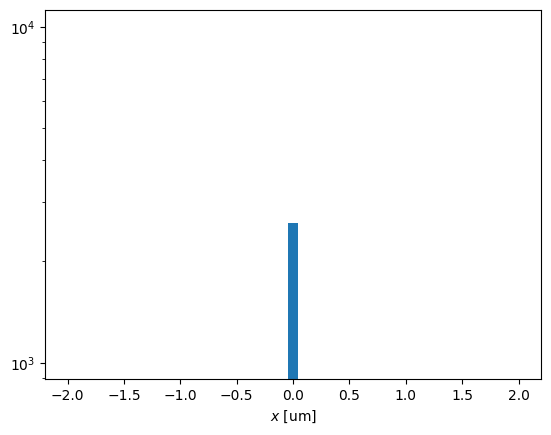

In [21]:
plt.hist(p_test[:,0],bins=np.linspace(-2,2,50))
plt.yscale('log')
plt.xlabel(r'$x$ [um]')

#save_fig_path = os.path.join(base_dir, 'x_dist.png')
#plt.savefig(save_fig_path)

plt.show()

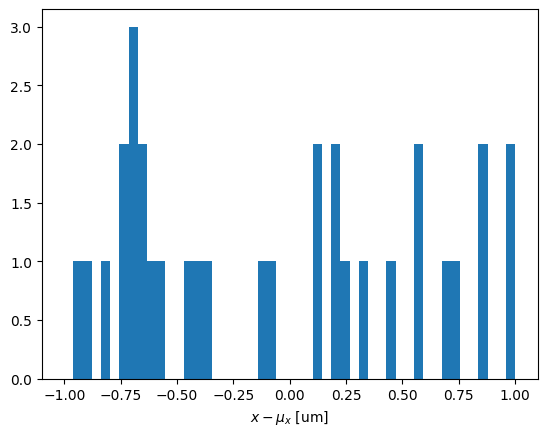

In [22]:
plt.hist(residuals,bins=np.linspace(-1,1,50))
#plt.yscale('Log')
plt.xlabel(r'$x-\mu_x$ [um]')

#save_fig_path = os.path.join(base_dir, 'x_res_dist.png')
#plt.savefig(save_fig_path)

plt.show()

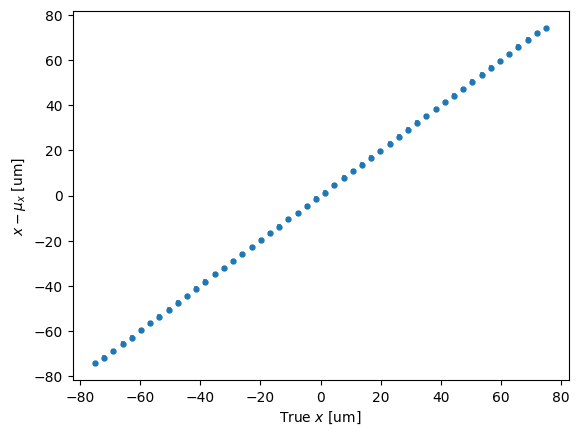

In [26]:
x = sns.regplot(x=df['xtrue'], y=(df['xtrue']-df['x']), x_bins=np.linspace(-75,75,50), fit_reg=None, marker='.')
plt.xlabel(r'True $x$ [um]')
plt.ylabel(r'$x-\mu_x$ [um]')

#save_fig_path = os.path.join(base_dir, 'x_vs_res.png')
#plt.savefig(save_fig_path)

plt.show()

In [25]:
min(df['xtrue'])

-74.98991394042969

In [14]:
np.linspace(-1,1,50)

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [9]:
df['xtrue']

0       1.953401e-06
1      -1.147367e-06
2       6.652156e-06
3      -3.238392e-07
4      -2.245828e-06
            ...     
8552    4.094036e-07
8553   -1.305013e-06
8554    3.859511e-07
8555   -1.912578e-07
8556    5.552644e-09
Name: xtrue, Length: 8557, dtype: float32

In [10]:
df['x']

0       0.096313
1      -0.005310
2       0.018250
3       0.063293
4       0.045288
          ...   
8552    0.069336
8553    0.022278
8554    0.065857
8555    0.071167
8556    0.081055
Name: x, Length: 8557, dtype: float32

<tf.Tensor: shape=(500, 4), dtype=float32, numpy=
array([[ 1.9534011e-06,  3.1854577e-06, -5.2159536e-01,  3.7237611e-02],
       [-1.1473669e-06, -1.5861623e-06,  5.2710271e-01, -1.5139881e-01],
       [ 6.6521561e-06, -2.1257800e-07,  6.6928500e-01,  2.1744016e-01],
       ...,
       [-1.2793189e-06,  1.2136934e-07, -8.4981728e-01,  4.7479909e-02],
       [ 1.0449221e-06,  6.7087751e-07,  1.0046810e+00, -8.0120504e-02],
       [ 1.1644505e-05, -3.8532557e-06,  1.0196804e+00, -4.8853710e-01]],
      dtype=float32)>